In [1]:
# load packages
import os
import sys
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
tf.__version__

'1.12.0'

## Load Data

In [2]:
data = pd.read_csv("data/iris-dataset.csv")

In [3]:
data.columns, data.shape

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'), (150, 6))

In [4]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


## Data Prepration

In [5]:
# get some statistical measures
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# check for null or missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
mapping = dict()
i = 0
for key in data.Species.unique():
    mapping[key] = i
    i += 1
mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [10]:
data.Species = data.Species.apply(lambda x: mapping[x])

In [11]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [12]:
train_x, val_x, train_y, val_y = train_test_split(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]], data[["Species"]], test_size=0.1)

In [13]:
train_x.shape, train_y.shape

((135, 4), (135, 1))

In [14]:
val_x.shape, val_y.shape

((15, 4), (15, 1))

In [15]:
train_y = tf.keras.utils.to_categorical(train_y, 3)
val_y = tf.keras.utils.to_categorical(val_y, 3)

In [16]:
train_y.shape, val_y.shape

((135, 3), (15, 3))

# Model

In [17]:
# initiate a stack model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=train_x.shape[1]))
model.add(tf.keras.layers.Dense(10, activation="relu"))
# output layer
model.add(tf.keras.layers.Dense(3, activation="sigmoid"))

In [18]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [19]:
cbk = [
    tf.keras.callbacks.EarlyStopping(patience=3)
]

In [20]:
hist = model.fit(
    train_x, train_y,
    epochs=20,
    batch_size=2,
    validation_data=(val_x, val_y),
    verbose=True,
    callbacks=cbk
)

Train on 135 samples, validate on 15 samples
Epoch 1/20
135/135 [==============================] - 0s 2ms/step - loss: 1.1062 - acc: 0.3333 - val_loss: 0.9828 - val_acc: 0.3333
Epoch 2/20
135/135 [==============================] - 0s 527us/step - loss: 0.9041 - acc: 0.6815 - val_loss: 0.8282 - val_acc: 0.8000
Epoch 3/20
135/135 [==============================] - 0s 526us/step - loss: 0.7971 - acc: 0.8444 - val_loss: 0.7259 - val_acc: 0.9333
Epoch 4/20
135/135 [==============================] - 0s 527us/step - loss: 0.6924 - acc: 0.8667 - val_loss: 0.6275 - val_acc: 0.7333
Epoch 5/20
135/135 [==============================] - 0s 550us/step - loss: 0.6208 - acc: 0.7037 - val_loss: 0.5591 - val_acc: 0.9333
Epoch 6/20
135/135 [==============================] - 0s 521us/step - loss: 0.5536 - acc: 0.8593 - val_loss: 0.5029 - val_acc: 0.7333
Epoch 7/20
135/135 [==============================] - 0s 555us/step - loss: 0.5032 - acc: 0.8667 - val_loss: 0.4730 - val_acc: 0.8667
Epoch 8/20
135/135 

# Visualize Model Performance

In [21]:
type(hist)

tensorflow.python.keras.callbacks.History

In [22]:
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

In [23]:
import matplotlib.pyplot as plt

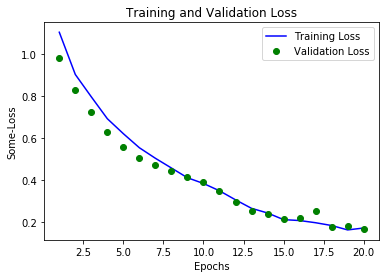

In [24]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "bo", label="Validation Loss", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Some-Loss")
plt.title("Training and Validation Loss")
plt.show()

In [25]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]

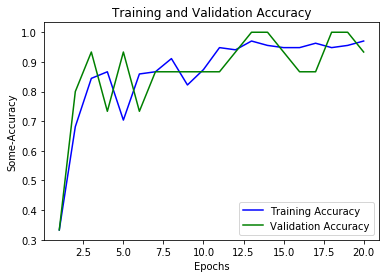

In [26]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "b", label="Training Accuracy", color="blue")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Some-Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()